# Data exploration and analysis

based on Taylor Swift discography

data scrapped with Spotify API

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

data_path = './drive/Shareddrives/EDTV/data/'
source_csv = "taylorswift_discography.csv"
new_source_csv = "taylorswift_discography_new.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


znaczenie kolumn w spotify:
* key - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. If no key was detected, the value is -1.
* mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
* energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
* instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly �vocal�. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 
* liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 
* loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
* speechiness - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 
* tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
* The time signature is a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.


In [ ]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import isnan
# from sklearn.preprocessing import MinMaxScaler

## Nowy poprawiony dataset

In [ ]:
df = pd.read_csv(data_path+new_source_csv, index_col=0)
df

,album_name,album_release_date,track_number,track_name,explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Taylor Swift,2006-10-24,1,Tim McGraw,False,232106,0.580,0.491,0,-6.462,1,0.0251,0.575,0.000000,0.1210,0.425,76.009,4
1,Taylor Swift,2006-10-24,2,Picture To Burn,False,173066,0.658,0.877,7,-2.098,1,0.0323,0.173,0.000000,0.0962,0.821,105.586,4
2,Taylor Swift,2006-10-24,3,Teardrops On My Guitar - Radio Single Remix,False,203040,0.621,0.417,10,-6.941,1,0.0231,0.288,0.000000,0.1190,0.289,99.953,4
3,Taylor Swift,2006-10-24,4,A Place in this World,False,199200,0.576,0.777,9,-2.881,1,0.0324,0.051,0.000000,0.3200,0.428,115.028,4
4,Taylor Swift,2006-10-24,5,Cold As You,False,239013,0.418,0.482,5,-5.769,1,0.0266,0.217,0.000000,0.1230,0.261,175.558,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Midnights (3am Edition),2022-10-22,16,Paris,False,196258,0.700,0.509,7,-10.547,1,0.0789,0.112,0.000033,0.1370,0.345,110.947,4
236,Midnights (3am Edition),2022-10-22,17,High Infidelity,False,231475,0.646,0.529,10,-10.179,1,0.0864,0.723,0.000000,0.0885,0.755,87.862,4
237,Midnights (3am Edition),2022-10-22,18,Glitch,False,148781,0.675,0.466,11,-9.738,0,0.2010,0.361,0.000000,0.1100,0.347,140.864,4
238,Midnights (3am Edition),2022-10-22,19,"Would've, Could've, Should've",False,260361,0.483,0.840,7,-6.508,1,0.1190,0.430,0.000575,0.1460,0.550,157.979,4


### statystyki kolumn

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,track_number,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,240.00,240.00,240.00,240.00,240.00,240.00,240.00,240.00,240.00,240.00,240.00,240.00,240.00,240.00
mean,10.95,238521.52,0.59,0.58,4.63,-7.43,0.91,0.06,0.30,0.00,0.14,0.41,123.72,3.99
std,6.60,46192.68,0.11,0.19,3.23,2.89,0.29,0.09,0.32,0.03,0.09,0.20,31.16,0.19
min,1.00,107133.00,0.29,0.12,0.00,-17.93,0.00,0.02,0.00,0.00,0.03,0.04,68.53,3.00
25%,5.75,211843.00,0.52,0.46,2.00,-9.01,1.00,0.03,0.03,0.00,0.09,0.26,96.97,4.00
50%,10.50,234530.50,0.60,0.58,5.00,-6.75,1.00,0.04,0.15,0.00,0.12,0.40,120.55,4.00
75%,15.25,258032.75,0.65,0.73,7.00,-5.41,1.00,0.06,0.61,0.00,0.16,0.54,145.88,4.00
max,30.00,613026.00,0.90,0.94,11.00,-2.10,1.00,0.91,0.97,0.35,0.66,0.94,208.92,5.00


In [ ]:
percent_of_NaNs = {}
for column in df:
  percent_of_NaNs[column] = 100*sum(pd.isnull(df[column]))/len(df[column])
percent_of_NaNs

{'album_name': 0.0,
 'album_release_date': 0.0,
 'track_number': 0.0,
 'track_name': 0.0,
 'explicit': 0.0,
 'duration_ms': 0.0,
 'danceability': 0.0,
 'energy': 0.0,
 'key': 0.0,
 'loudness': 0.0,
 'mode': 0.0,
 'speechiness': 0.0,
 'acousticness': 0.0,
 'instrumentalness': 0.0,
 'liveness': 0.0,
 'valence': 0.0,
 'tempo': 0.0,
 'time_signature': 0.0}

#### histogramy

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba536aa940>,
      dtype=object)

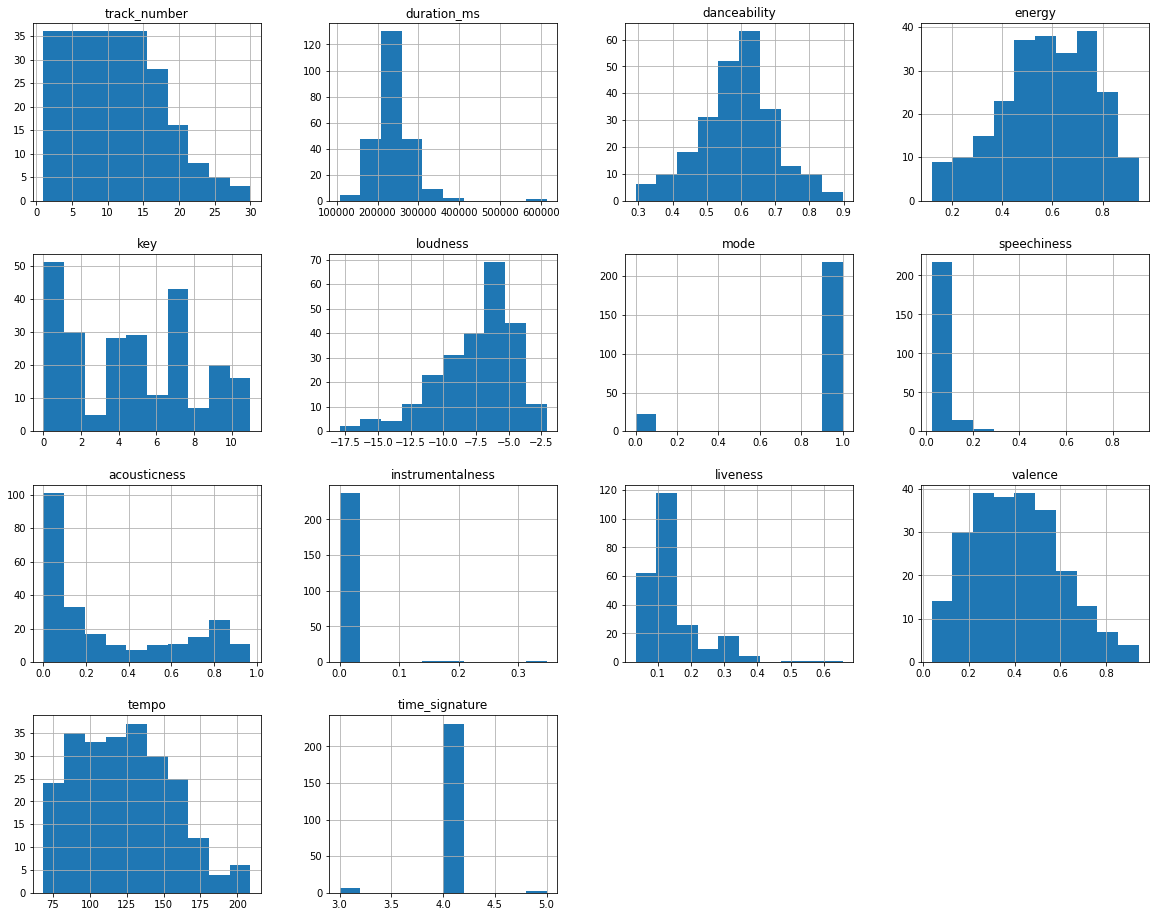

In [ ]:
df.hist(figsize=(20, 16))

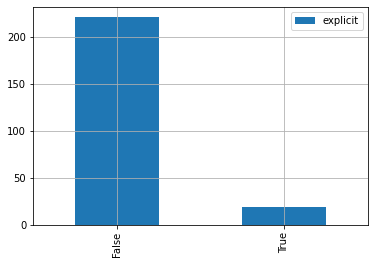

In [ ]:
df["explicit"].value_counts().to_frame().plot(kind="bar")
plt.grid()

### zamiana czasu na format MM:SS

In [ ]:
df['duration'] = pd.to_timedelta(df['duration_ms'], unit='ms').map(lambda x: f"{x.total_seconds()//60:.0f}:{int(x.total_seconds())%60:02d}")

### macierz korelacji

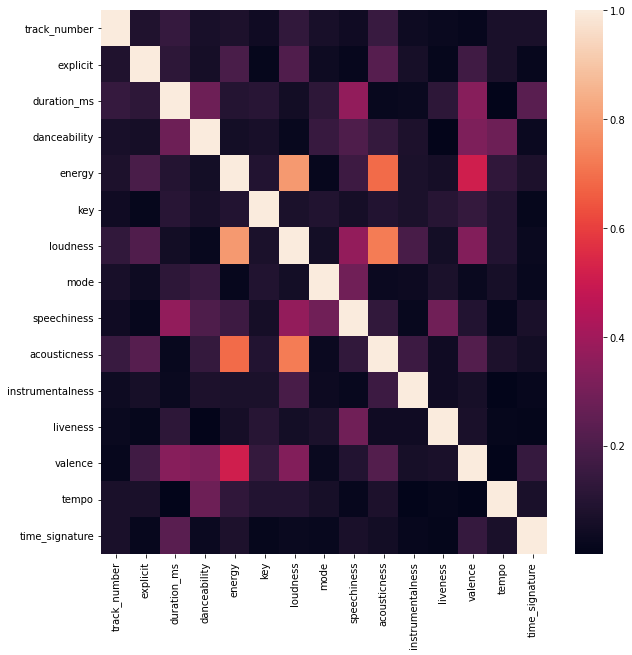

In [ ]:
corr = abs(df.corr())
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax)

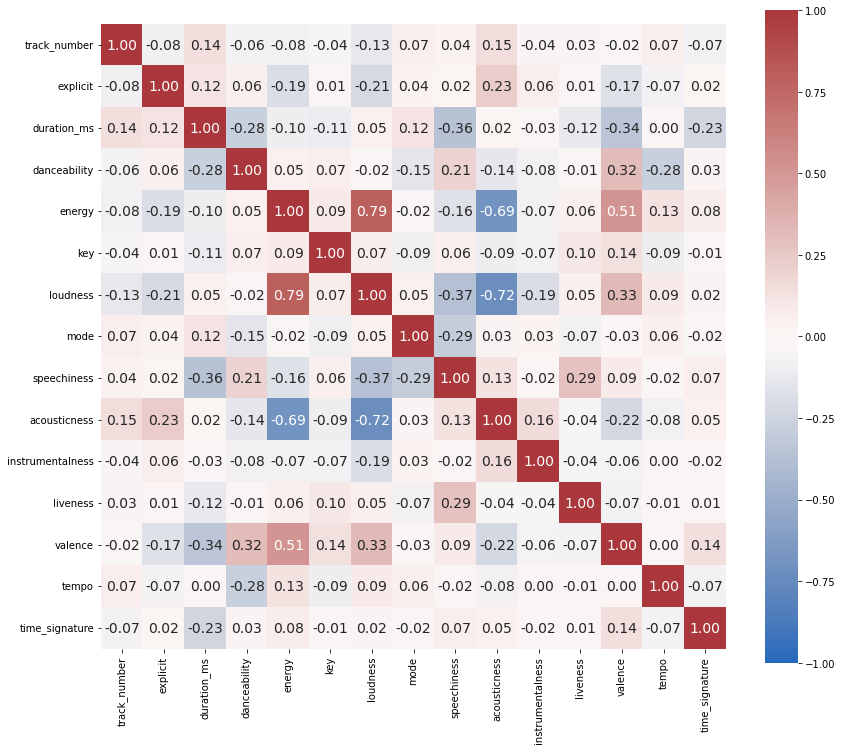

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(14,12)) 
# sns.set(font_scale=1.4)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        ax=ax,
        vmin=-1,
        vmax=1,
        cmap="vlag",
        annot=True,
        fmt=".2f",
        square=True,
        annot_kws={"size": 14}
)
# sns.set(font_scale=1)
# corr.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).set_precision(2)

### scatter plot wg albumu


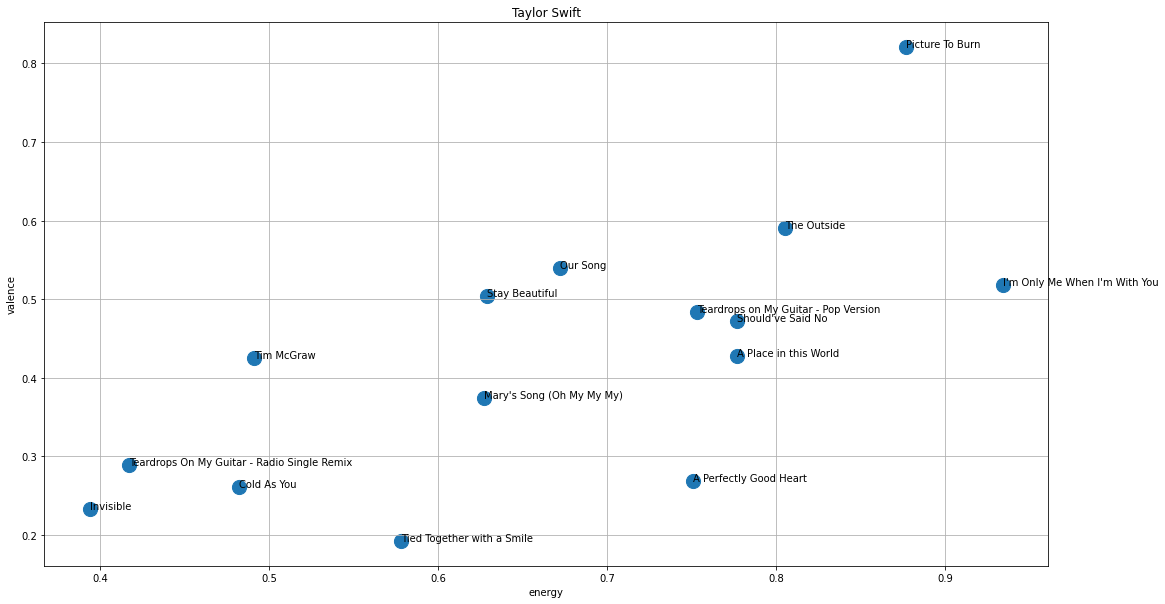

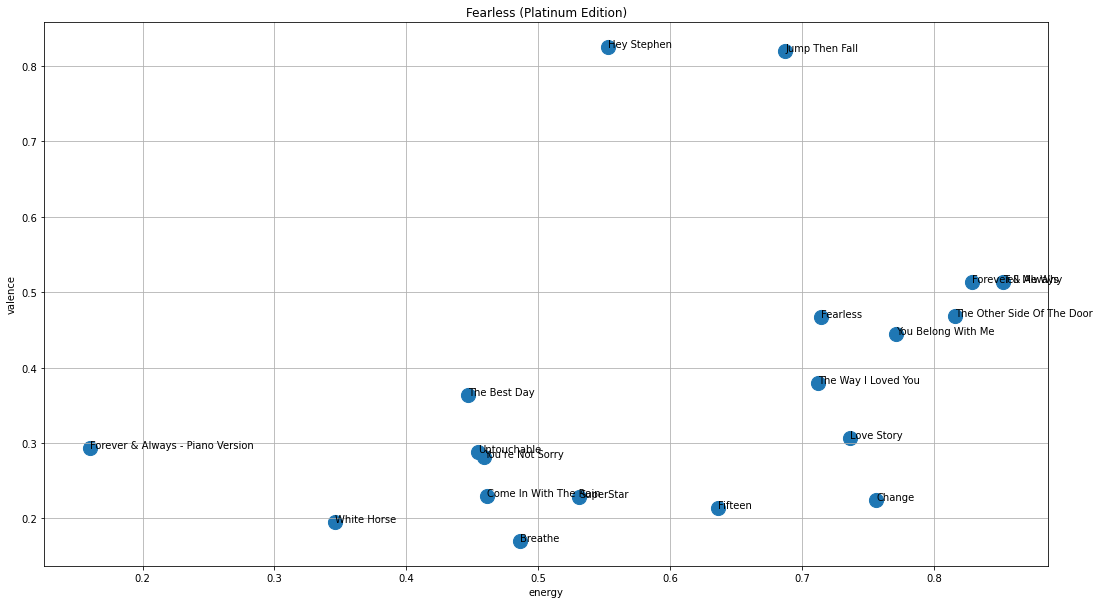

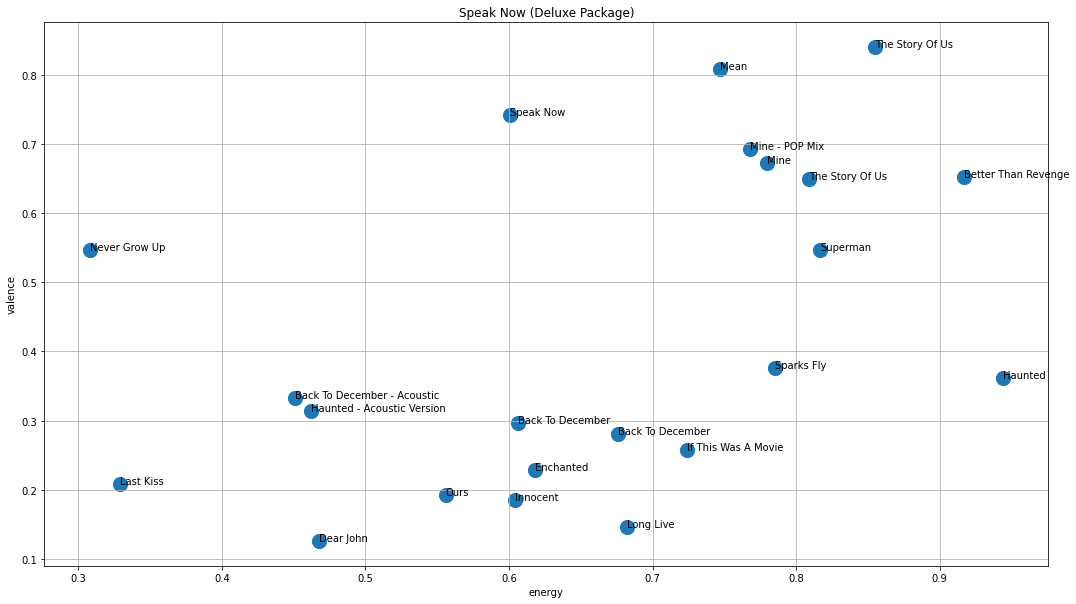

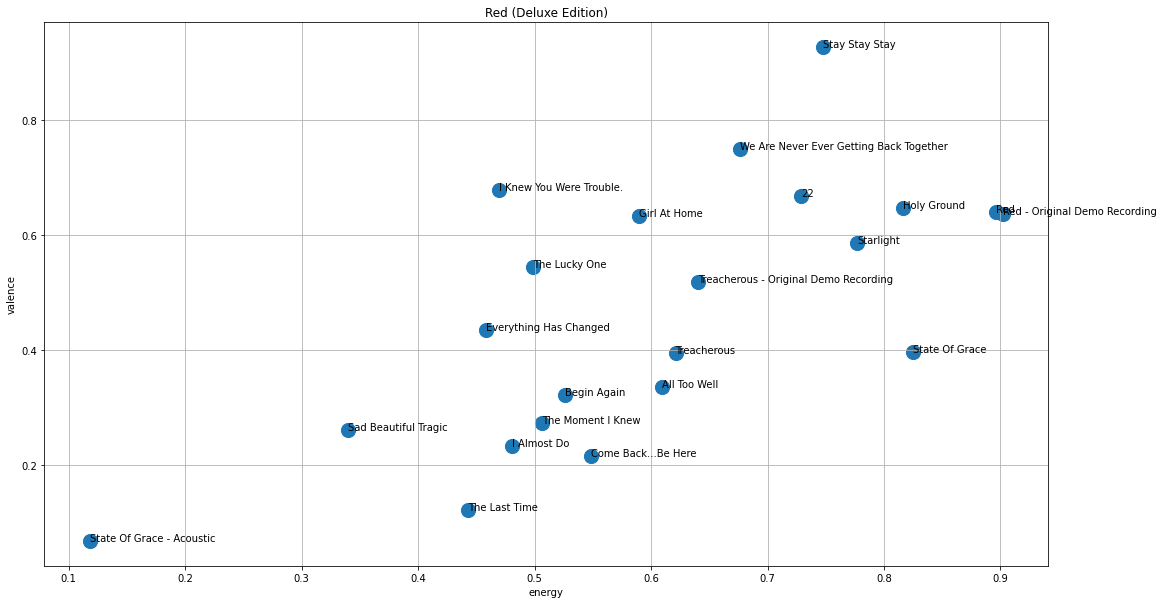

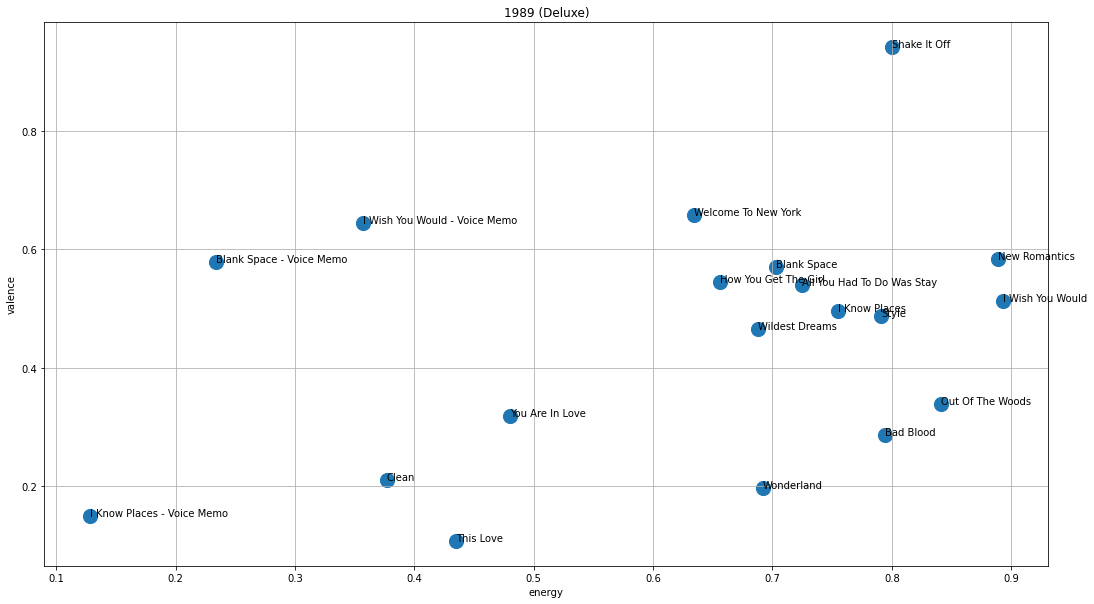

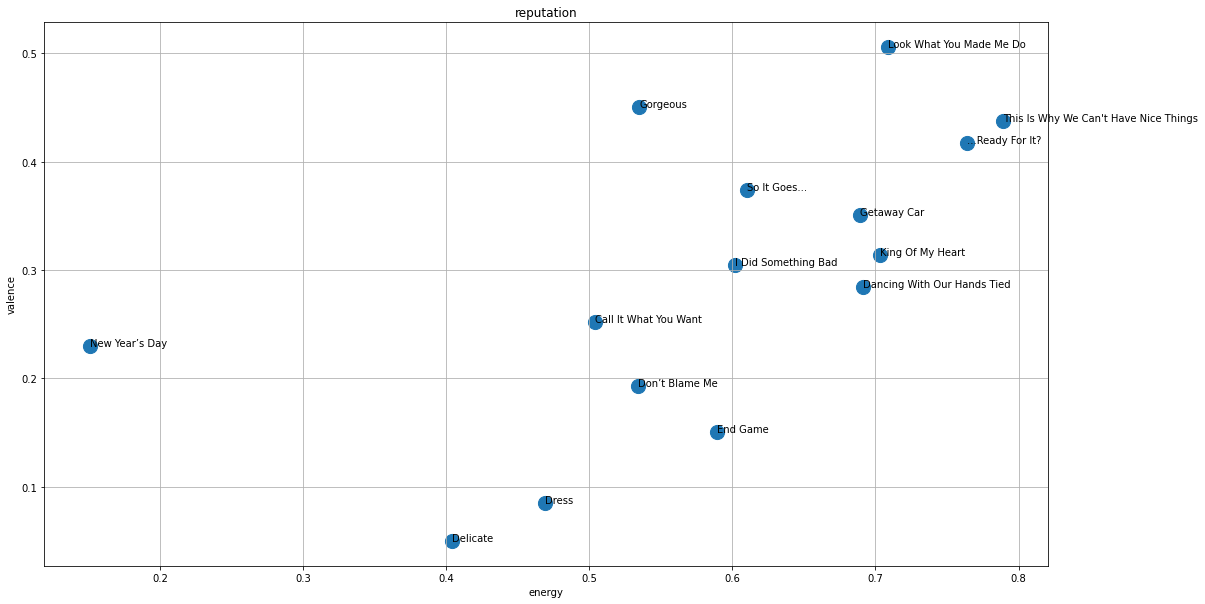

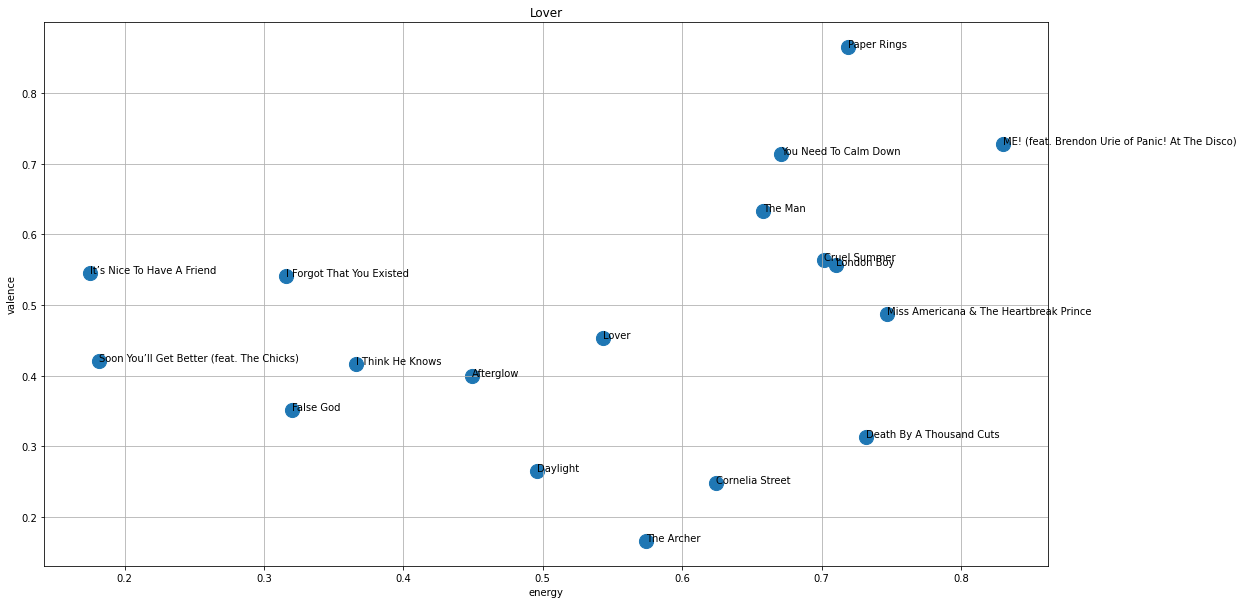

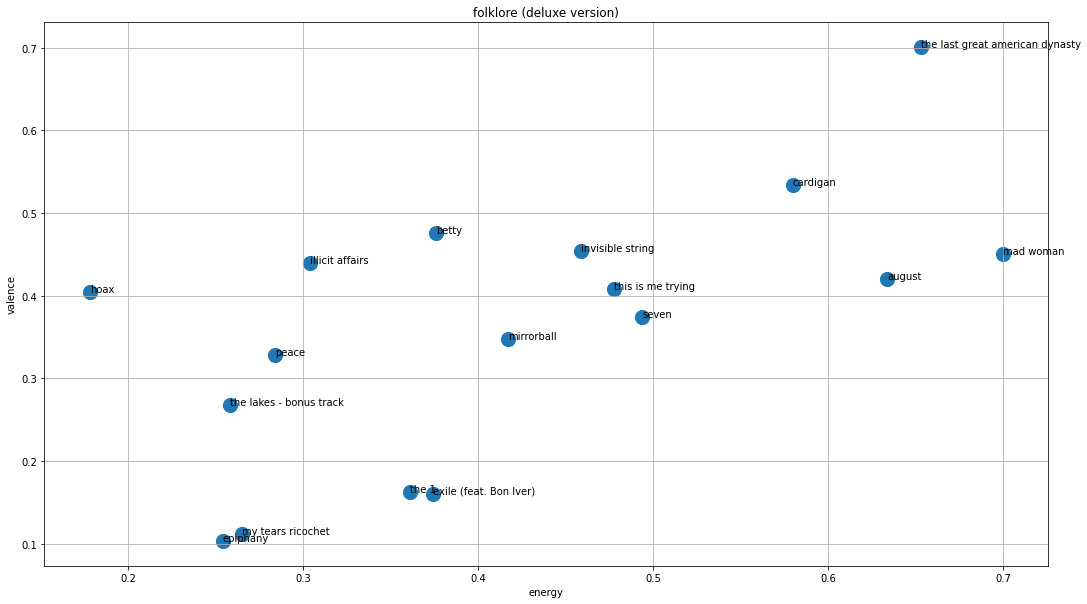

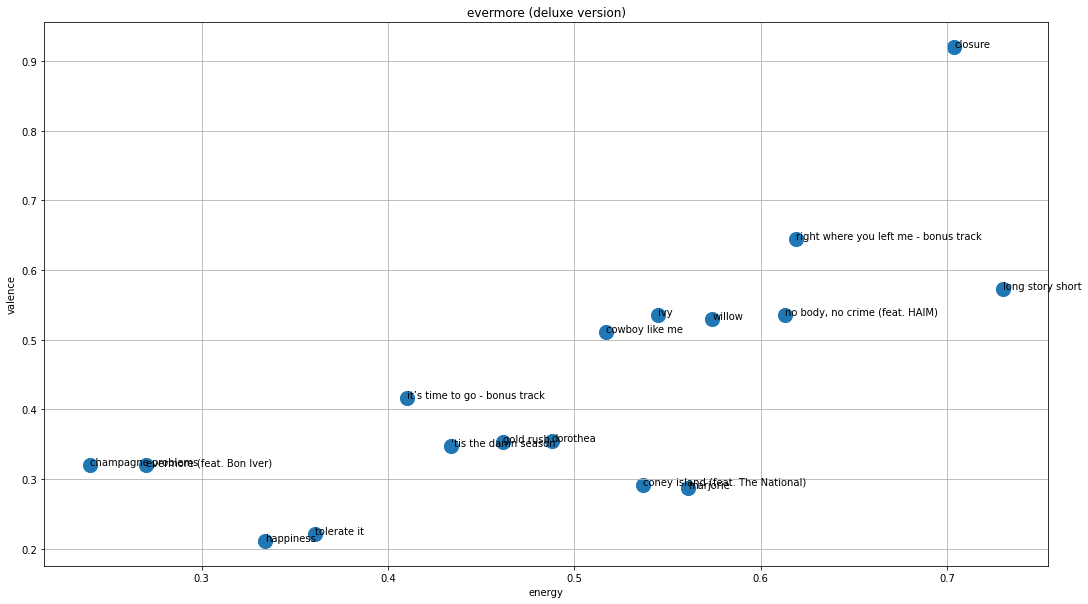

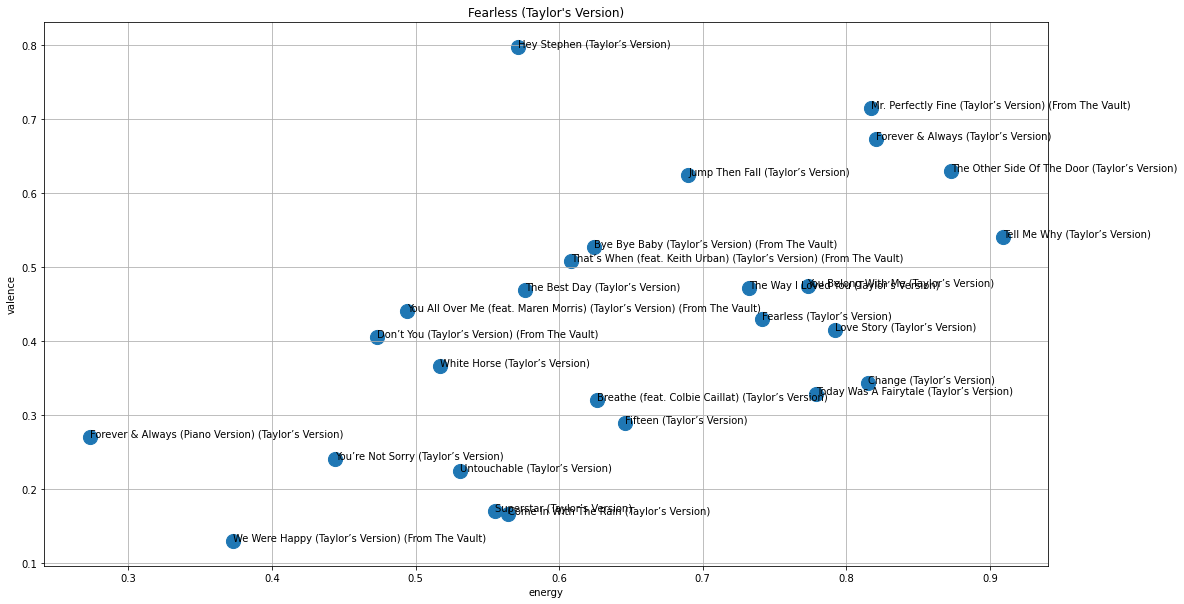

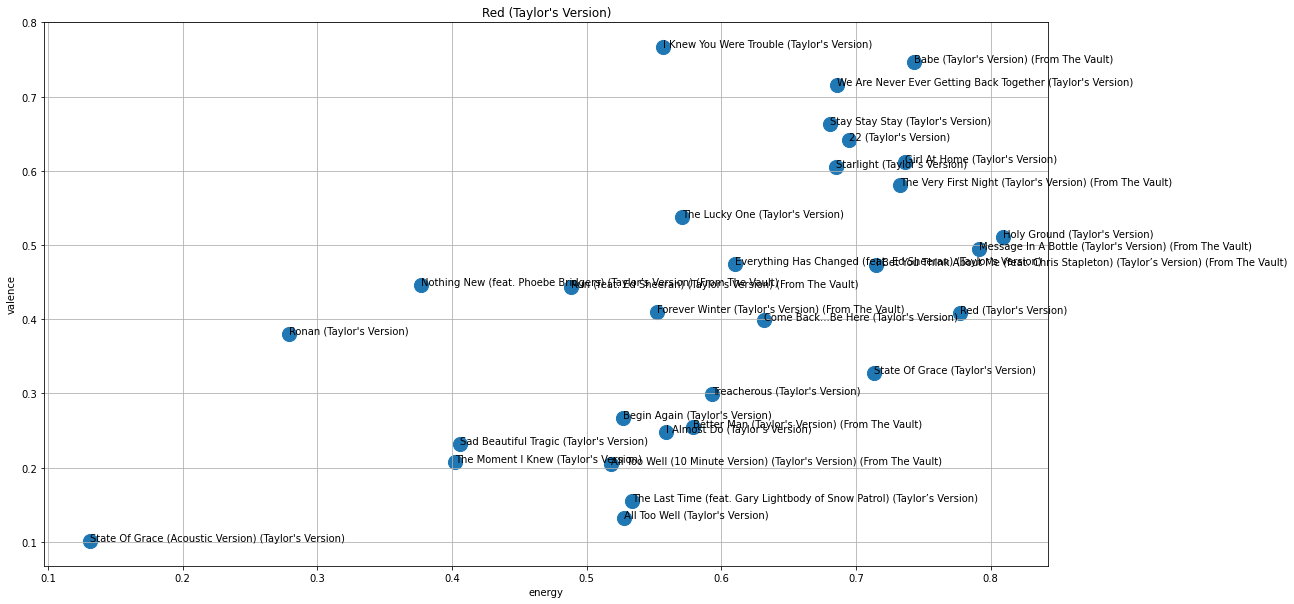

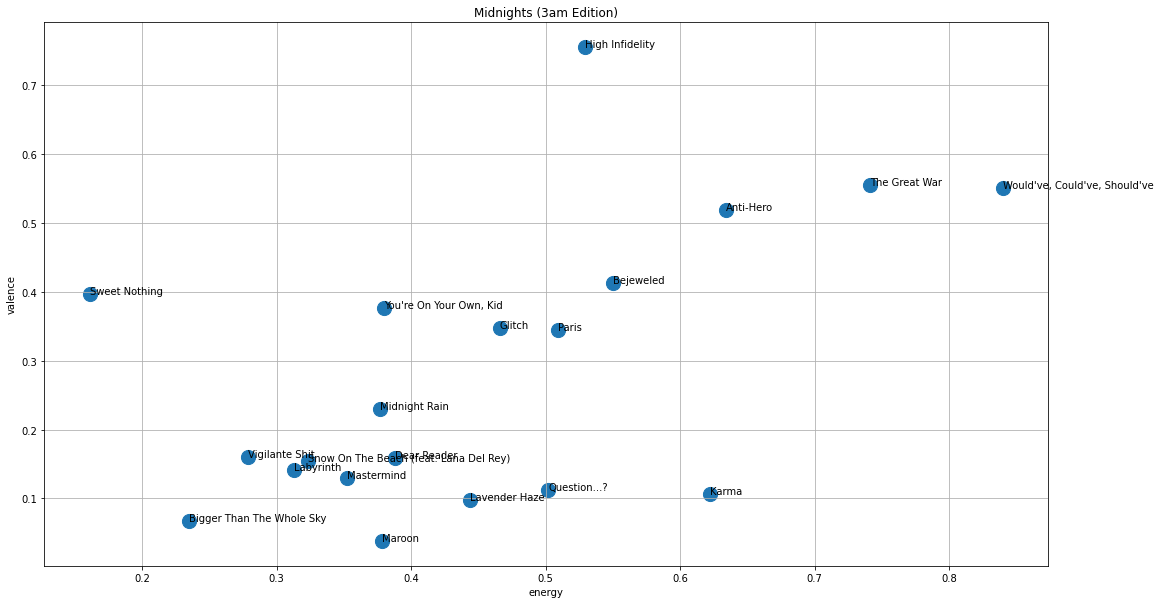

In [ ]:
def plot_scatter_between(col1:str, col2:str):
  albums = df["album_name"].unique()
  for album in albums:
    temp_df = df[df["album_name"] == album]
    f = plt.figure(figsize=(18, 10))
    ax = plt.gca()
    temp_df.plot.scatter(x=col1, y=col2, title=f"{album}", ax=ax, s=200)
    for _, row in temp_df.iterrows():
      plt.text(x=row[col1], y=row[col2], s=row["track_name"])
    plt.grid()

plot_scatter_between("energy", "valence")

### wyodrębnienie elementów nietypowych

In [ ]:
from sklearn.neighbors import NearestNeighbors

columns = ["duration_ms", "danceability", "energy", "acousticness", "valence", "tempo"]
czulosc = 0.05
k = 4
m = len(df)
knn = NearestNeighbors(n_neighbors=k+1, algorithm = 'brute')
elementy_nietypowe_dict = {}
for column in columns:
    column_std = column + "_std"
    df[column_std] = (df[column] - df[column].mean()) / df[column].std()
    X = df[column_std].values
    X = X.reshape(m, 1)
    knn.fit(X)
    # Gather the kth nearest neighbor distance
    distances, indexes = knn.kneighbors(X)
    k_neighbour_tuple = tuple(zip(distances[:,-1], indexes[:, 0]))
    k_neighbour_tuple = sorted(k_neighbour_tuple, key=lambda x: x[0])
    outliers_number = int(m*czulosc)
    outliers_indexes = [x[1] for x in k_neighbour_tuple[-outliers_number:]]
    elementy_nietypowe_dict[column] = df.iloc[outliers_indexes]

In [ ]:
def show_outliers(column):
    column_std = column + "_std"
    outliers_df = elementy_nietypowe_dict[column][["album_name", "track_number", "track_name", "duration", column, column_std]].sort_values(by=[column_std]).drop_duplicates()
    without_outliers_df = pd.concat([df, outliers_df]).drop_duplicates(keep=False)
    f = plt.figure(figsize=(12, 8))
    range = (0, 1)
    if column == "duration_ms":
        range = (0, df[column].max())
    if column == "tempo":
        range = (df[column].min(), df[column].max())
    without_outliers_df[column].plot.hist(bins=50, ax=plt.gca(), range=range)
    outliers_df[column].plot.hist(bins=50, ax=plt.gca(), range=range)
    plt.xlabel(column)
    plt.grid()
    # f = plt.figure(figsize=(12, 8))
    # df[column_std].plot.hist(bins=40)
    # plt.xlabel(column_std)
    # plt.grid()
    # f = plt.figure(figsize=(12, 8))
    # plot_scatter_between(column, "track_number")
    return outliers_df

,album_name,track_number,track_name,duration,duration_ms,duration_ms_std
95,1989 (Deluxe),18,I Wish You Would - Voice Memo,1:47,107133,-2.844358
96,1989 (Deluxe),19,Blank Space - Voice Memo,2:11,131186,-2.323648
237,Midnights (3am Edition),18,Glitch,2:28,148781,-1.942743
128,Lover,17,It’s Nice To Have A Friend,2:30,150440,-1.906829
227,Midnights (3am Edition),8,Vigilante Shit,2:44,164801,-1.595935
178,Fearless (Taylor's Version),15,Untouchable (Taylor’s Version),5:12,312107,1.593012
60,Red (Deluxe Edition),5,All Too Well,5:29,329160,1.962183
42,Speak Now (Deluxe Package),9,Enchanted,5:52,352200,2.460963
46,Speak Now (Deluxe Package),13,Last Kiss,6:07,367146,2.784521
38,Speak Now (Deluxe Package),5,Dear John,6:43,403887,3.579907


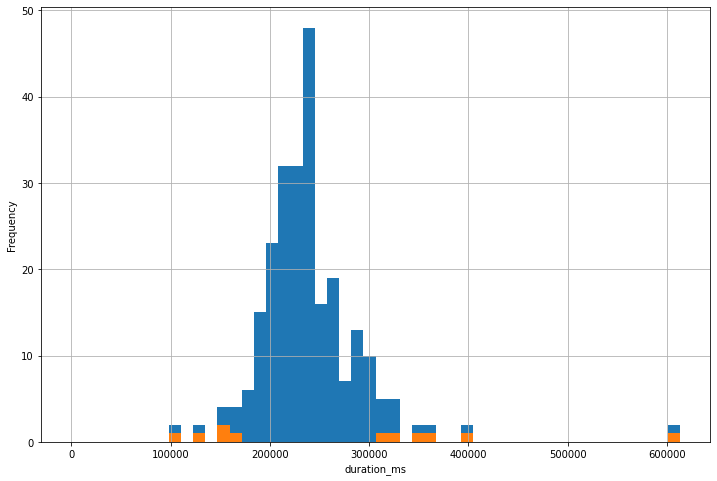

In [ ]:
show_outliers("duration_ms")

,album_name,track_number,track_name,duration,danceability,danceability_std
116,Lover,5,The Archer,3:31,0.292,-2.680415
133,folklore (deluxe version),4,exile (feat. Bon Iver),4:45,0.310,-2.518150
146,folklore (deluxe version),17,the lakes - bonus track,3:31,0.313,-2.491106
151,evermore (deluxe version),5,tolerate it,4:05,0.316,-2.464062
231,Midnights (3am Edition),12,Sweet Nothing,3:08,0.334,-2.301797
114,Lover,3,Lover,3:41,0.359,-2.076429
119,Lover,8,Paper Rings,3:42,0.811,1.998226
120,Lover,9,Cornelia Street,4:47,0.824,2.115417
24,Fearless (Platinum Edition),10,Hey Stephen,4:14,0.843,2.286697
227,Midnights (3am Edition),8,Vigilante Shit,2:44,0.870,2.530094


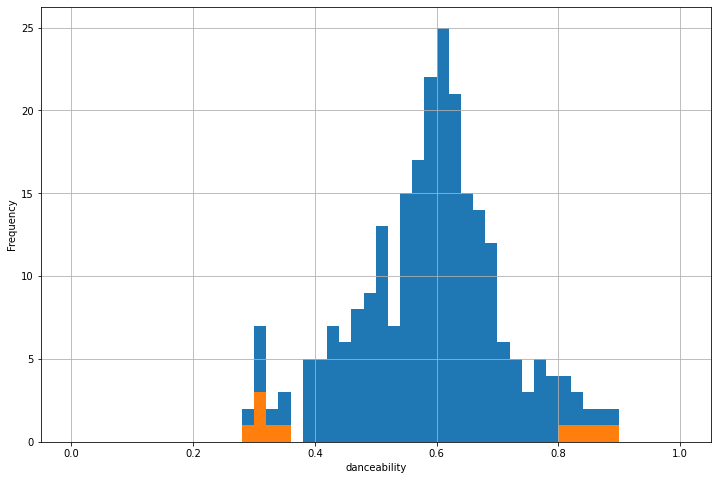

In [ ]:
show_outliers("danceability")

,album_name,track_number,track_name,duration,energy,energy_std
77,Red (Deluxe Edition),22,State Of Grace - Acoustic,5:23,0.118,-2.451562
94,1989 (Deluxe),17,I Know Places - Voice Memo,3:36,0.128,-2.398033
209,Red (Taylor's Version),20,State Of Grace (Acoustic Version) (Taylor's Ve...,5:21,0.131,-2.381975
111,reputation,15,New Year’s Day,3:55,0.151,-2.274918
123,Lover,12,Soon You’ll Get Better (feat. The Chicks),3:21,0.182,-2.108979
96,1989 (Deluxe),19,Blank Space - Voice Memo,2:11,0.234,-1.830631
234,Midnights (3am Edition),15,Bigger Than The Whole Sky,3:38,0.235,-1.825278
28,Fearless (Platinum Edition),14,Tell Me Why,3:20,0.852,1.477432
182,Fearless (Taylor's Version),19,The Other Side Of The Door (Taylor’s Version),3:58,0.873,1.589842
43,Speak Now (Deluxe Package),10,Better Than Revenge,3:37,0.917,1.825367


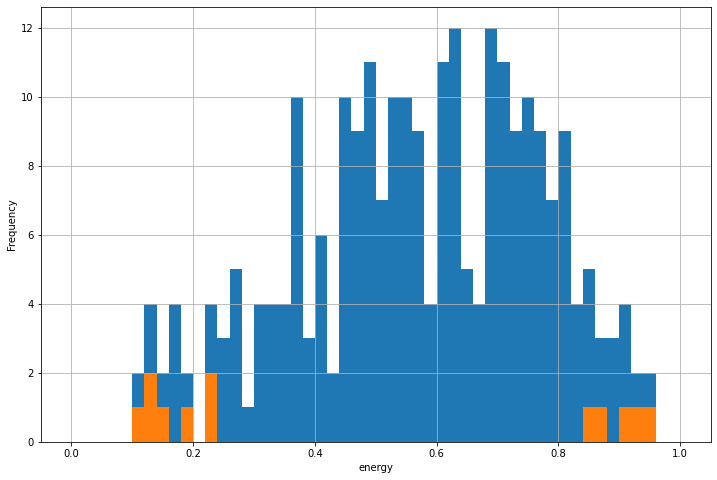

In [ ]:
show_outliers("energy")

,album_name,track_number,track_name,duration,acousticness,acousticness_std
224,Midnights (3am Edition),5,"You're On Your Own, Kid",3:14,0.416,0.357392
152,evermore (deluxe version),6,"no body, no crime (feat. HAIM)",3:35,0.418,0.363650
39,Speak Now (Deluxe Package),6,Mean,3:57,0.445,0.448127
131,folklore (deluxe version),2,cardigan,3:59,0.525,0.698431
137,folklore (deluxe version),8,august,4:21,0.553,0.786038
46,Speak Now (Deluxe Package),13,Last Kiss,6:07,0.581,0.873644
201,Red (Taylor's Version),12,Sad Beautiful Tragic (Taylor's Version),4:44,0.622,1.001925
67,Red (Deluxe Edition),12,Sad Beautiful Tragic,4:44,0.632,1.033213
145,folklore (deluxe version),16,hoax,3:40,0.964,2.071974
231,Midnights (3am Edition),12,Sweet Nothing,3:08,0.967,2.081360


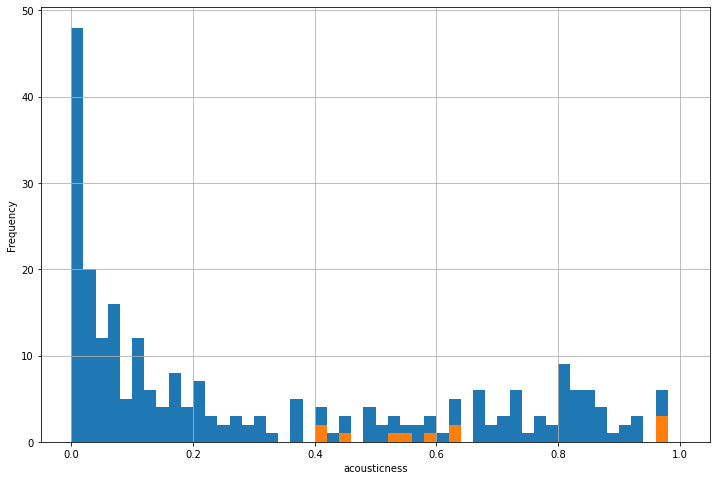

In [ ]:
show_outliers("acousticness")

,album_name,track_number,track_name,duration,valence,valence_std
221,Midnights (3am Edition),2,Maroon,3:38,0.0382,-1.891400
101,reputation,5,Delicate,3:52,0.0499,-1.831576
234,Midnights (3am Edition),15,Bigger Than The Whole Sky,3:38,0.0680,-1.739028
77,Red (Deluxe Edition),22,State Of Grace - Acoustic,5:23,0.0682,-1.738005
208,Red (Taylor's Version),19,Girl At Home (Taylor's Version),3:40,0.6120,1.042537
193,Red (Taylor's Version),4,I Knew You Were Trouble (Taylor's Version),3:39,0.7670,1.835079
167,Fearless (Taylor's Version),4,Hey Stephen (Taylor’s Version),4:14,0.7970,1.988474
40,Speak Now (Deluxe Package),7,The Story Of Us,4:25,0.8400,2.208340
119,Lover,8,Paper Rings,3:42,0.8650,2.336170
160,evermore (deluxe version),14,closure,3:00,0.9200,2.617394


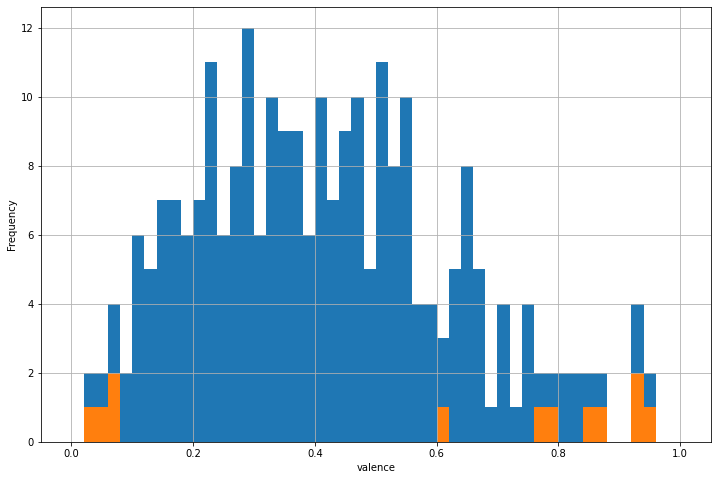

In [ ]:
show_outliers("valence")

,album_name,track_number,track_name,duration,tempo,tempo_std
114,Lover,3,Lover,3:41,68.534,-1.771110
128,Lover,17,It’s Nice To Have A Friend,2:30,70.008,-1.723803
231,Midnights (3am Edition),12,Sweet Nothing,3:08,176.747,1.701871
146,folklore (deluxe version),17,the lakes - bonus track,3:31,179.947,1.804572
91,1989 (Deluxe),14,Wonderland,4:05,184.014,1.935098
168,Fearless (Taylor's Version),5,White Horse (Taylor’s Version),3:54,185.262,1.975151
194,Red (Taylor's Version),5,All Too Well (Taylor's Version),5:29,185.972,1.997938
14,Taylor Swift,15,Teardrops on My Guitar - Pop Version,2:59,199.997,2.448056
16,Fearless (Platinum Edition),2,Untouchable,5:11,200.017,2.448697
178,Fearless (Taylor's Version),15,Untouchable (Taylor’s Version),5:12,200.391,2.460701


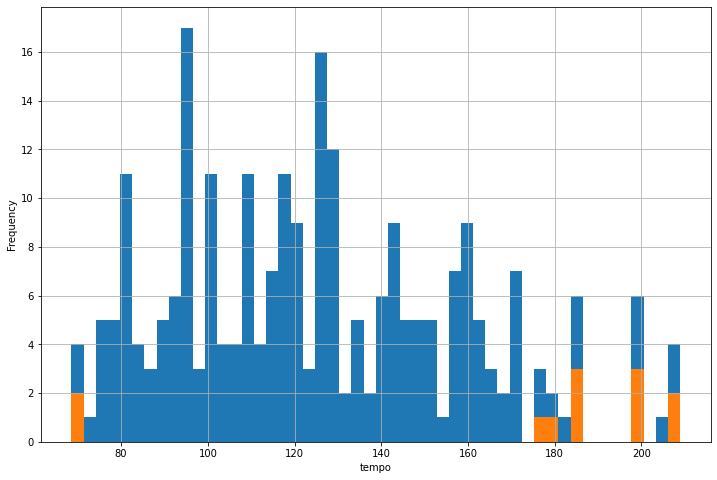

In [ ]:
show_outliers("tempo")

### klasteryzacja (k means)

In [ ]:
from sklearn.cluster import KMeans
k = 4
m = len(df)
columns = ["energy", "acousticness", "valence", "tempo"]
columns_std = list(map(lambda x: x+"_std", columns))
kmeans = KMeans(n_clusters=k, random_state=0).fit(df[columns_std])
df["cluster_label"] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
print(kmeans.labels_)
print(columns_std)
print(*cluster_centers, sep="\n")

print(df[df["cluster_label"] == 2][["album_name", "track_number", "track_name", "duration", *columns]].to_string())

[2 1 2 1 3 1 3 1 3 2 2 1 0 3 3 1 3 0 3 2 1 2 2 2 1 2 1 3 1 3 3 1 0 2 1 1 3
 1 2 1 1 0 2 1 3 3 0 3 3 3 1 0 0 1 3 1 1 1 2 2 2 1 3 1 1 2 1 0 2 2 1 2 2 2
 1 1 1 0 1 1 1 2 1 1 1 3 1 1 0 1 2 3 0 1 0 0 0 3 3 2 3 2 1 2 2 3 2 3 2 3 3
 0 2 1 2 1 2 2 1 1 0 2 1 0 0 1 2 1 0 0 0 1 1 0 0 0 0 2 3 0 0 1 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 1 0 1 0 1 0 2 2 1 1 3 1 3 1 3 3 1 2 2 1 3 0 3 3 1 3 0
 1 0 2 0 2 3 1 2 1 3 1 3 1 1 2 1 0 1 2 1 2 2 2 1 0 0 2 0 1 1 1 2 0 1 2 2 2
 2 0 0 0 2 2 3 0 2 0 0 1 0 2 0 3 1 0]
['energy_std', 'acousticness_std', 'valence_std', 'tempo_std']
[-1.1544723   1.46488776 -0.45828399 -0.11685787]
[ 0.91267127 -0.56249995  1.05004098  0.17033665]
[-0.10882698 -0.42706099 -0.44586354 -0.89811611]
[ 0.21650876 -0.57997156 -0.62622721  1.15207255]
                      album_name  track_number                                                              track_name duration  energy  acousticness  valence    tempo
0                   Taylor Swift             1                                   

In [ ]:
# define and map colors
'''plt.figure(figsize=(12, 8))
colors = ['#DF2020', '#81DF20', '#2095DF', 'red', 'yellow']
df['c'] = df.cluster_label.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})
plt.xlabel("Energy")
plt.ylabel("Tempo")
sc = plt.scatter(df.energy, df.tempo, c=df.c, alpha = 0.6, s=10)
plt.legend()'''

'plt.figure(figsize=(12, 8))\ncolors = [\'#DF2020\', \'#81DF20\', \'#2095DF\', \'red\', \'yellow\']\ndf[\'c\'] = df.cluster_label.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})\nplt.xlabel("Energy")\nplt.ylabel("Tempo")\nsc = plt.scatter(df.energy, df.tempo, c=df.c, alpha = 0.6, s=10)\nplt.legend()'

<Figure size 864x576 with 0 Axes>

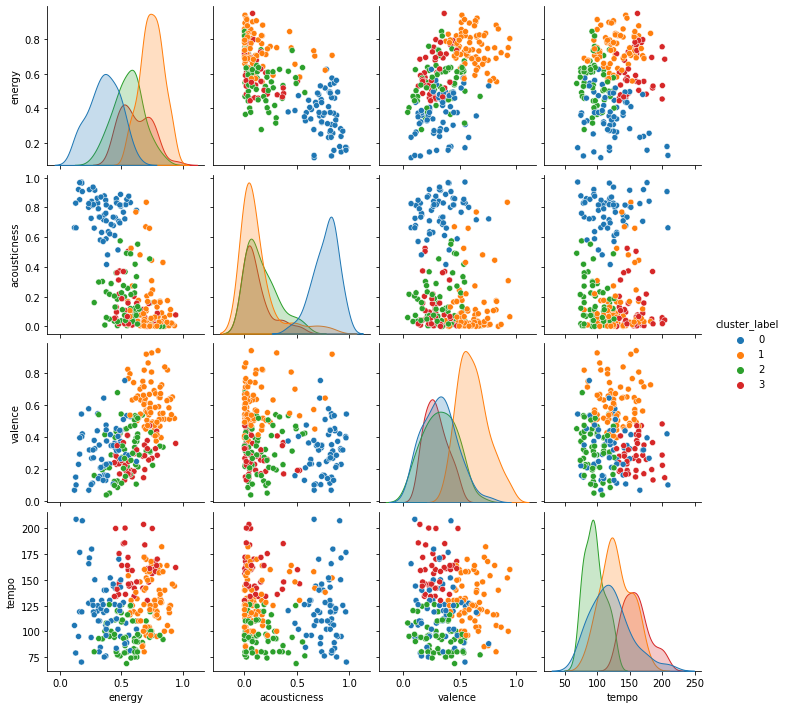

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[[*columns, "cluster_label"]], hue = "cluster_label", palette=sns.color_palette("tab10", k))


### klasyfikacja (knn)

kilka najslynniejszych piosenek z kazdego klastra zostało odłożonych i dokonano klasyfikacji aby sprawdzić czy zostaną oznaczone tak samo jak w klasteryzacji

#### odłożenie kilku piosenek

In [ ]:
famous_songs_names = [
    "Shake It Off", 
    "Blank Space", 
    "Wildest Dreams", 
    "Style", 
    "Love Story", 
    "Love Story (Taylor’s Version)", 
    "You Belong With Me",
    "Enchanted",
    "Anti-Hero",
    "Bejeweled",
    "Teardrops On My Guitar - Radio Single Remix",
    "I Knew You Were Trouble.",
    "Look What You Made Me Do",
    "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)",
    "ME! (feat. Brendon Urie of Panic! At The Disco)",
    "Lover",
    "cardigan",
    "willow"
]
len(famous_songs_names)

18

In [ ]:
famous_songs_df = df[df["track_name"].isin(famous_songs_names)]
songs_without_famous_ones_df = pd.concat([df, famous_songs_df]).drop_duplicates(keep=False)
# famous_songs_df
songs_without_famous_ones_df

,album_name,album_release_date,track_number,track_name,explicit,duration_ms,danceability,energy,key,loudness,...,tempo,time_signature,duration,duration_ms_std,danceability_std,energy_std,acousticness_std,valence_std,tempo_std,cluster_label
0,Taylor Swift,2006-10-24,1,Tim McGraw,False,232106,0.580,0.491,0,-6.462,...,76.009,4,3:52,-0.138886,-0.084175,-0.454948,0.854871,0.086374,-1.531208,2
1,Taylor Swift,2006-10-24,2,Picture To Burn,False,173066,0.658,0.877,7,-2.098,...,105.586,4,2:53,-1.417011,0.618973,1.611253,-0.402906,2.111190,-0.581965,1
3,Taylor Swift,2006-10-24,4,A Place in this World,False,199200,0.576,0.777,9,-2.881,...,115.028,4,3:19,-0.851250,-0.120234,1.075968,-0.784619,0.101714,-0.278934,1
4,Taylor Swift,2006-10-24,5,Cold As You,False,239013,0.418,0.482,5,-5.769,...,175.558,4,3:59,0.010640,-1.544560,-0.503124,-0.265239,-0.752186,1.663712,3
5,Taylor Swift,2006-10-24,6,The Outside,False,207106,0.589,0.805,5,-4.055,...,112.982,4,3:27,-0.680097,-0.003042,1.225848,-0.928826,0.935161,-0.344598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Midnights (3am Edition),2022-10-22,16,Paris,False,196258,0.700,0.509,7,-10.547,...,110.947,4,3:16,-0.914940,0.997592,-0.358597,-0.593763,-0.322679,-0.409910,2
236,Midnights (3am Edition),2022-10-22,17,High Infidelity,False,231475,0.646,0.529,10,-10.179,...,87.862,4,3:51,-0.152546,0.510797,-0.251539,1.317934,1.773721,-1.150798,0
237,Midnights (3am Edition),2022-10-22,18,Glitch,False,148781,0.675,0.466,11,-9.738,...,140.864,4,2:28,-1.942743,0.772224,-0.588769,0.185308,-0.312453,0.550245,3
238,Midnights (3am Edition),2022-10-22,19,"Would've, Could've, Should've",False,260361,0.483,0.840,7,-6.508,...,157.979,4,4:20,0.472791,-0.958603,1.413198,0.401195,0.725521,1.099532,1


#### wyniki

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=k)

# Train the model using the training sets
model.fit(songs_without_famous_ones_df[columns_std], songs_without_famous_ones_df["cluster_label"])
predicted_labels = model.predict(famous_songs_df[columns_std])
i: int = 0
classification_res_df = pd.DataFrame(columns = ['track_name', 'predicted', 'actual'])
for _, song in famous_songs_df.iterrows():
    classification_res_df = classification_res_df.append(
        {
            'track_name': song["track_name"], 
            'predicted': predicted_labels[i], 
            'actual': song["cluster_label"]
        },
        ignore_index = True)
    i += 1
classification_res_df

,track_name,predicted,actual
0,Teardrops On My Guitar - Radio Single Remix,2,2
1,Love Story,1,2
2,You Belong With Me,1,1
3,Enchanted,2,2
4,I Knew You Were Trouble.,1,2
5,Blank Space,1,1
6,Style,1,1
7,Shake It Off,1,1
8,Wildest Dreams,1,1
9,Look What You Made Me Do,1,1
